<img src="https://www.lsretail.com/hs-fs/hubfs/BLOG_supermarket-retail-physical-store.jpg?width=1239&height=620&name=BLOG_supermarket-retail-physical-store.jpg" width="1800px" height="379px">


# Exploratory Data Analysis - Retail (Level - Beginner)
### Author - Mayariwala Mohammed Ahmed
### Date: 20/12/2022
GRIP batch :-  #GRIPDECEMBER22

---

#### Table of Content
 * [1. Summary](#1)
 * [2. Ask Phase](#2)
    * [2.1 Buisness Task](#2.1)
 * [3. Prepare Phase](#3)
    * [3.1 Data Used](#3.1)
    * [3.2 Data Limitations](#3.2)
    * [3.3 Data Organization](#3.3)
    * [3.4 Data Creditiblity and Integrity](#3.4)
* [4. Process](#4)
    * [4.1 importing and assigning](#4.1)
        * [4.1.1 Importing packages](#4.1.1)
        * [4.1.2 Assigning data to variable](#4.1.2)
    * [ 4.2 Previewing our Dataset](#4.2)
        * [4.2.1 Isolating Loss records](#4.2.1)
    * [4.3 Cleaning And formating](#4.3)
    * [4.3.1 Checking Outiers in our data](#4.3.1)
    * [4.3.2 Cleaned Data Preview](#4.2.2)
* [5. Analyze phase And Share Phase](#5)
    * [5.1 Dataset Exploration / Overview dataset analysis](#5.1)
    * [5.2 How does Sales, Quantity and Discount affects SuperStores Profits?](#5.2)
    * [5.3 Does Giving Discount increases sales?](#5.3)
    * [5.4 Average Profit / Loss across "Category" and "Sub-Category"t](#5.4)
    * [5.5 Buyers diversity in "Ship Mode"](#5.5)
    * [5.6 Superstores Regions Based Report](#5.6)
    * [5.7 Profit/ Loss, Sales and Discounts diversity by States!](#5.7)

## 1. Summary  <a class="anchor" id="1"></a>
This is a sample superstore dataset, a kind of a simulation where you perform extensive data analysis to deliver insights on how the company can increase its profits while minimizing the losses. 

---

## 2. Ask phase  <a class="anchor" id="2"></a>
### 2.1 Buisness Task:  <a class="anchor" id="2.1"></a>
 > Perform Exploratory Data Analysis (EDA) on dataset ‘SampleSuperstore
 and as business manager, find the weak areas to work to make more profit
 
 > Discovering the weak areas of the sales deparment in order to improve the sales.
 
 This task will extract information. Appropriate preprocessing will be conducted, followed by data investigation. The primary attention will be on profit-related factors, which are the attributes 'Sales' and 'Profit' in American Dollars (USD) measures, as well as the integer value of 'Quantity' and percentage values of 'Discount' for each sales transaction. Analyzing them will aid in identifying and assessing problem areas.
 
---
 
## 3. Prepare Phase  <a class="anchor" id="3"></a>
### 3.1 Data Used:  <a class="anchor" id="3.1"></a>
The data used for our Exploratory Data Analysis(EDA) is a sample data Provided it self by Spark foundation and This data is also stored on Kaggle by *Aman Sharma*.

The sample superstore dataset consists data ranging from the type of product sold, where it is sold to and how they are shipped.

### 3.2 Data Limitation:  <a class="anchor" id="3.2"></a>
* Only sales is provided without any meta data
* the sales data does not contain date information, we cannot perform Time Series Analysis. This helps us study the impact of different times on individual recorded data.
* We also cannot confirm whether this sample data is representative of its dataset and free of biases.

### 3.3 Data Organisation:  <a class="anchor" id="3.3"></a>
The Data is available in CSV document. Recording all the *'Sales'* and *'Profit'* data in each rows. The data is considered long since every row registers single "sub-category" sales record in a single row meaning the subject will have data records in muliple row for each time of sales

**Glimps of Document**

| Dataset Name | Type | Description |
| --- | --- | --- |
| SampleSuperstore | Microsoft Excel CSV | Contains all records of sales nessasry for  this EDA |

### 3.4 Data Creditiblity and Integrity of Data: <a class="anchor" id="3.4"></a>
There isn't much meta data available to verify and certify data integrity. Even in the data description, it is stated that this is sample data used to run simulations and practise, therefore it does not have to be correct.

---


## 4. Process Phase <a class="anchor" id="4"></a>
For this case study we would be using **Python Programming language**.
Your Data analysis Toolbox should include *python* as it has amazing verity of packages for data Analysis i,e. Analyzing Numerical Data with *'NumPy'*, Tabular data with *'Pandas'*, data visualization *'Matplotlib'* and many more.
Visit [here](https://www.geeksforgeeks.org/data-analysis-with-python/) to  know more!

### 4.1 Importing and Assigning Data <a class="anchor" id="4.1"></a>
#### 4.1.1 Importing Packages <a class="anchor" id="4.1.1"></a>

In [1]:
# basic libraries
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#### 4.1.2 Assigning data to variable <a class="anchor" id="4.1.2"></a>

In [2]:
data = pd.read_csv(r"/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv")

#### 4.2 Previewing our Dataset <a class="anchor" id="4.2"></a>

In [3]:
data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

There are two ways we may go about doing it as part of our business work, which comprises locating the areas of our firm where we are weak and comprehending the problem.
1. Maintaining the record as is and investigating the weak variables as a whole
<a class="anchor" id="earl"></a>
2. Isolating the records where the sales are in loss and figureing the the factors effecting the lost most 

*P.S. When concentrating on just weak areas, it is best to isolate the data because doing so allows us to optimise the process to the greatest extent possible. However, when working with the entire data set, to discover more information and see more trends clearly 
>For instance 
> 1. *If a tablet device had a loss of 3,000 and a profit of 3,500, working with the data set as a whole will result in a profit of 500 rather than 3,000 and in order to show the loss, additional rules must be added.*<a class="anchor" id="earl"></a>

Our business task is restricted to loss factors, thus we won't be using all of our data.
we would use our whole data for few purposes such as finding average sell price of items and stuff

---

#### 4.3 Cleaning And formating   <a class="anchor" id="4.3"></a>

Lets Start by checking if there are typos or noises of impossible values or errors of inconsistent values in our dataset

In [4]:
Cat = [i for i in data.columns if data.dtypes[i] == 'object']
for j in Cat:
    print('\033[95m' + j + '\033[0m')
    print(sorted(data[j].unique()))

Ship Mode
['First Class', 'Same Day', 'Second Class', 'Standard Class']
Segment
['Consumer', 'Corporate', 'Home Office']
Country
['United States']
City
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream'

The output shown above clearly shows that the data is free of typos, repetitive entries, and structural issues (such as uneven capitalization or incorrectly designated columns).   <a class="anchor" id="states"></a>

In [5]:
data.dtypes.to_frame()

0
Ship Mode      object
Segment        object
Country        object
City           object
State          object
Postal Code     int64
Region         object
Category       object
Sub-Category   object
Sales         float64
Quantity        int64
Discount      float64
Profit        float64

The dataset as for now has 9994 rows of records and 13 columns of attributes. The attribute data types are 8 qualitative discrete categorical(Objects/Strings), 2 quantitative discrete numerical integer, and 3 quantitative continuous numerical float.

-----

### Colotr Palette For the notebook
I like to utilise colour schemes in my reports and chart representations, and "seaborn" offers a wide variety of colours. Let's assign the colour scheme to a variable so we can use it in our charts [Click here](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) for additional information on 

In [6]:
palette_color=sns.color_palette("flare")

sns.palplot(palette_color, size = 3)
plt.text(-0.75,-0.75, "Superstore's Retails: Visualizations & Classifications",{'font':'serif', 'size':24, 'weight':'bold'})
plt.text(-0.75,-0.65, 'Lets try to stick to these colors throughout presentation.',{'font':'serif', 'size':16},alpha = 0.9)
plt.gcf().set_facecolor('#f5f6f6')
plt.gcf().set_dpi(100)
plt.box(None)
plt.axis('off')
plt.show()

---

### 4.3.1 Checking Outiers in our data <a class="anchor" id="4.3.1"></a>

Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers.
Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.
we will be using [**Turkey's Methord**](https://www.cuemath.com/outlier-formula/) for finding outliers.
Turkey's method is a mathematical method to find outliers. As per the Turkey method, the outliers are the points lying beyond the upper boundary of  Q3  +1.5 IQR and the lower boundary of Q1  - 1.5 IQR. These boundaries are referred to as outlier fences. 
>As our dataframe is really small having outliers in our dataset will greatly skew the results and it is nessasry to treat them 
---

We will be using Panda's ".describe()" methord to get the overview of our data's numrical diversity and also plot chart to visualise them  

In [7]:
data.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

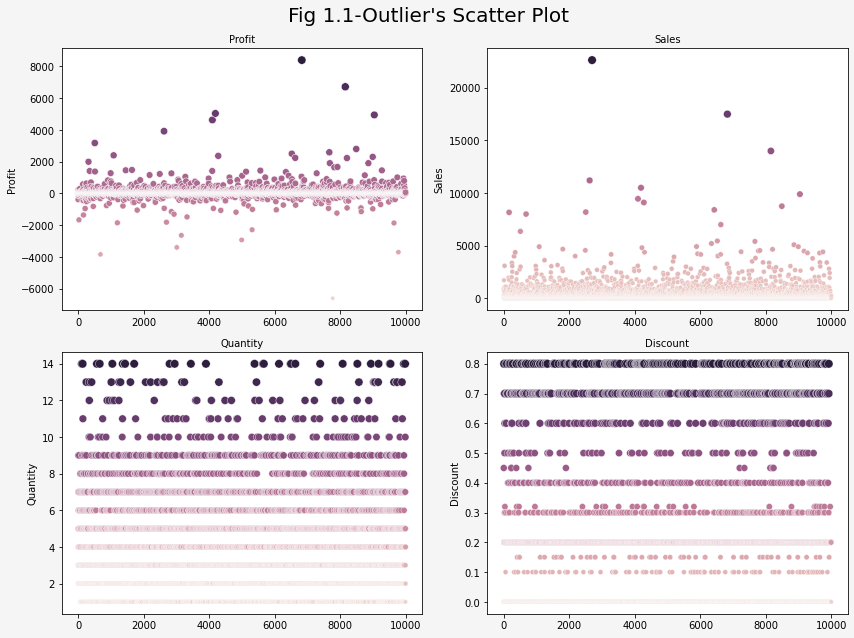

In [8]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9));
fig.patch.set_facecolor('#f6f5f5')
sns.scatterplot(data = data,y="Profit", x = data.index, ax = axs[0][0],hue = "Profit", size = "Profit" , legend = False)
axs[0][0].set_title('Profit', fontsize = 10)

sns.scatterplot(data=data, y ="Sales", x = data.index, ax = axs[0][1], hue ="Sales", size = "Sales" , legend=False)
axs[0][1].set_title('Sales', fontsize = 10)

sns.scatterplot(data=data, y = "Quantity", x = data.index, ax = axs[1][0], hue = "Quantity", size = "Quantity", legend=False)
axs[1][0].set_title('Quantity', fontsize = 10)

sns.scatterplot(data= data, y = "Discount", x = data.index, ax = axs[1][1], hue = "Discount", size = "Discount", legend=False)
axs[1][1].set_title('Discount', fontsize = 10)
plt.suptitle("Fig 1.1-Outlier's Scatter Plot",fontsize = 20)


plt.tight_layout()

there certainly are many things going on as such, We clearly see that in "Profit" column Max point and minimum point of our data is vast apart and same goes for "Sales" and "Quantity" Column
Lets apply our Turkey's Methodology for understanding the fence for outliers stands in our dataset

| Quartiles | Sales | Quantity | Discount | "Profit" |
| --- | --- | --- | ---- | ---- |
| Q1(25%) | 17.28 | 2 | 0 | 1.72 |
| Q3(75%) | 209.94 | 5 | 0.20 | 29.36 |
| IQR(Q3 - Q1) | 192.66 | 3 | 0.2 | 27.64 |
| Range(Q1-1.5 * IQR to Q3+1.5 * IQR) | -271.65 to 498.93 | -2.5 to 9.5 | -0.3 to 0.5 | 59.92 to 70.82 |

Some outliers represents natural variations in the population, and they should be left as is in your dataset. These are called **true outliers**. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

As its not made clear in our meta, that the dataset is not representive of its dataset we would assume that the data is showcasing natrual variations and are true outliers.

---

### **Extras** (for curiousity)
we can also try to analyse data by clearing its outliers to get the general behaviour of our supershop's sales.
Just to see how would our data look when our data get ride of outliers lets see 

In [9]:
data_outliers = data[data["Profit"]<70]; data_outliers = data_outliers[data_outliers["Profit"]>-40]
data_outliers = data_outliers[data["Sales"]<498.93] ; data_outliers = data_outliers[data_outliers["Quantity"]<9.5]
data_outliers = data_outliers[data_outliers["Discount"]<0.5]


print(f"The total number of records containing outliers = {data.shape[0]-data_outliers.shape[0]}\nThe outliers forms {round((data.shape[0]-data_outliers.shape[0])/data.shape[0]*100,2)}% of superstore's dataset")

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));

sns.scatterplot(data=data_outliers, y = "Profit", x = data_outliers.index, ax = axs[0][0], hue="Profit", size="Profit", legend=False)
sns.scatterplot(data=data_outliers, y = "Sales", x = data_outliers.index, ax = axs[0][1], hue ="Sales", size ="Sales", legend=False)
sns.scatterplot(data=data_outliers,y = "Quantity",x = data_outliers.index, ax = axs[1][0], hue = "Quantity", size ="Quantity", legend=False)
sns.scatterplot(data=data_outliers,y = "Discount",x = data_outliers.index, ax = axs[1][1], hue = "Discount", size = "Discount", legend=False)
axs[0][0].set_title('Loss', fontsize = 10)
axs[0][1].set_title('Sales', fontsize = 10)
axs[1][0].set_title('Quantity', fontsize = 10)
axs[1][0].set_title('Discount', fontsize = 10)
plt.suptitle("fig 2.1 Extra's No Outlier Scatterplot",fontsize=20)
plt.tight_layout()

The total number of records containing outliers = 2869
The outliers forms 28.71% of superstore's dataset


---

#### Data Reduction <a class="anchor" id="4.3.2"></a>
**Data Reduction** Dropping the variable 'Country' via attribute dimensionality reduction, because it contains 100% identical values of "United States" for all records. 'Postal Code' as we wont be using it in our data analysis as we also have the variabl e of "citys"

In [10]:
clean_data=data.drop(['Country','Postal Code'], axis=1)

Now we are going to handle the duplicate entries in our data set.
#### Treating duplicate values
Duplicated rows or records can now by dropped from the dataset, as this redundancy may cause inaccurate results and outcomes (an assumption on the dataset).

In [11]:
print(f"Number of duplicate recocrds present in the dataset = {clean_data.duplicated().sum()}")


Number of duplicate recocrds present in the dataset = 50


In [12]:
clean_data.drop_duplicates(inplace=True)

---

#### adding 2 additional columns 
we will now add two new Feature/Columns to our dataset that shows the price of "per item" and amount profit/loss made on that item 


In [13]:
# Unit Profit calculation
clean_data['Unit Price'] = clean_data.Sales / clean_data.Quantity

# Unit Profit calculation
clean_data['Unit Profit'] = clean_data.Profit / clean_data.Quantity 

---

Now Lets View our cleaned data before proceding to analysing phase let view our cleaned dataset

### 4.3.2 Cleaned Data Preview <a class="anchor" id="4.3.2"></a>


In [14]:
clean_data

Ship Mode    Segment             City       State Region  \
0       Second Class   Consumer        Henderson    Kentucky  South   
1       Second Class   Consumer        Henderson    Kentucky  South   
2       Second Class  Corporate      Los Angeles  California   West   
3     Standard Class   Consumer  Fort Lauderdale     Florida  South   
4     Standard Class   Consumer  Fort Lauderdale     Florida  South   
...              ...        ...              ...         ...    ...   
9989    Second Class   Consumer            Miami     Florida  South   
9990  Standard Class   Consumer       Costa Mesa  California   West   
9991  Standard Class   Consumer       Costa Mesa  California   West   
9992  Standard Class   Consumer       Costa Mesa  California   West   
9993    Second Class   Consumer      Westminster  California   West   

             Category Sub-Category     Sales  Quantity  Discount    Profit  \
0           Furniture    Bookcases  261.9600         2      0.00   41.9136   
1           Furniture       Chairs  731.9400         3      0.00  219.5820   
2     Office Supplies       Labels   14.6200         2      0.00    6.8714   
3           Furniture       Tables  957.5775         5      0.45 -383.0310   
4     Office Supplies      Storage   22.3680         2      0.20    2.5164   
...               ...          ...       ...       ...       ...       ...   
9989        Furniture  Furnishings   25.2480         3      0.20    4.1028   
9990        Furniture  Furnishings   91.9600         2      0.00   15.6332   
9991       Technology       Phones  258.5760         2      0.20   19.3932   
9992  Office Supplies        Paper   29.6000         4      0.00   13.3200   
9993  Office Supplies   Appliances  243.1600         2      0.00   72.9480   

      Unit Price  Unit Profit  
0       130.9800      20.9568  
1       243.9800      73.1940  
2         7.3100       3.4357  
3       191.5155     -76.6062  
4        11.1840       1.2582  
...          ...          ...  
9989      8.4160       1.3676  
9990     45.9800       7.8166  
9991    129.2880       9.6966  
9992      7.4000       3.3300  
9993    121.5800      36.4740  

[9944 rows x 13 columns]

As the data has been clean and formatted properly lets now jump into the main stage of our report that is Analyzing and sharing phase

## 5. Analyze phase And Share Phase <a class="anchor" id="5"></a>

#### 5.1 Dataset Exploration / Overview dataset analysis <a class="anchor" id="5.1"></a>

In [15]:
clean_data.describe(include="all")

Ship Mode   Segment           City       State Region  \
count             9944      9944           9944        9944   9944   
unique               4         3            531          49      4   
top     Standard Class  Consumer  New York City  California   West   
freq              5930      5160            906        1980   3177   
mean               NaN       NaN            NaN         NaN    NaN   
std                NaN       NaN            NaN         NaN    NaN   
min                NaN       NaN            NaN         NaN    NaN   
25%                NaN       NaN            NaN         NaN    NaN   
50%                NaN       NaN            NaN         NaN    NaN   
75%                NaN       NaN            NaN         NaN    NaN   
max                NaN       NaN            NaN         NaN    NaN   

               Category Sub-Category         Sales     Quantity     Discount  \
count              9944         9944   9944.000000  9944.000000  9944.000000   
unique                3           17           NaN          NaN          NaN   
top     Office Supplies      Binders           NaN          NaN          NaN   
freq               5986         1518           NaN          NaN          NaN   
mean                NaN          NaN    230.752150     3.794047     0.156440   
std                 NaN          NaN    624.644765     2.228752     0.206584   
min                 NaN          NaN      0.444000     1.000000     0.000000   
25%                 NaN          NaN     17.340000     2.000000     0.000000   
50%                 NaN          NaN     55.000000     3.000000     0.200000   
75%                 NaN          NaN    210.104000     5.000000     0.200000   
max                 NaN          NaN  22638.480000    14.000000     0.800000   

             Profit   Unit Price  Unit Profit  
count   9944.000000  9944.000000  9944.000000  
unique          NaN          NaN          NaN  
top             NaN          NaN          NaN  
freq            NaN          NaN          NaN  
mean      28.770873    61.124538     7.828362  
std      234.841370   143.230314    56.213175  
min    -6599.978000     0.336000 -1319.995600  
25%        1.724800     5.492000     0.719100  
50%        8.679950    16.360000     2.766400  
75%       29.534700    63.980000     8.798900  
max     8399.976000  3773.080000  1679.995200

There will be "NaN" in a few of the classified columns, but that's acceptable. Since categorical values are not meant to be subjected to calculations, they can be ignored.

The individual frequency and count of the category variables are of particular relevance. So let's examine the data.

**1- Categorical Features**
> The total number of Rows is the first thing to note. As can be seen, **there are 9944 rows** in all.

> There are four "Ship Modes," with "Standard class" receiving orders over 5,930 times, or roughly 60% of business orders.

> There are 3 buyer segments, and more than 50% of sales came from the **"Consumer"** segment, which is repeated 5160 times.

> The store has seventeen Sub-Categories and three Main Product Categories. With 5,986 orders, or 58% of all records, "Office supplies" is the category that has been ordered the most.
> and the most popular item in the category, "Binders," received 1,518 orders, accounting for 15.2% of our dataset.

> Our data was collected from 4 regions, 49 states, and 531 cities across the United States, with the majority of orders coming from the **"West Region" (3,177), "California" (1,980) State, and "New York City" (531).

**2- Numrical Features**
> According to this data, Superstore's has an average of 230.7 sales accross all records, having a minimum sales of 0.44 and maximum sales of 22,638.

>Superstore sells 3-4 quantity of items on average across all sales records, also recording its max quantity sold of 14 items 

>Superstore provides a discount of 15-20%  on average on all its products sold. it is also recorded of providing discounts upto 80% on occassions.

>Superstores gains a profit of 28.77USD on average on its sales. it is also recorded on facing loss as low as 6,599USD and profit as high as 8,399USD

now as we know all the basics information of our data lets see which numrical features are affexting our profits 

---

### 5.2 How does Sales, Quantity and Discount affects SuperStores Profits?<a class="anchor" id="5.2"></a>


We can check this out by ploting a heatmap showcasing the corealation between each numrical columns across
we won't be including the feature we added in the dataframe for this correlation.

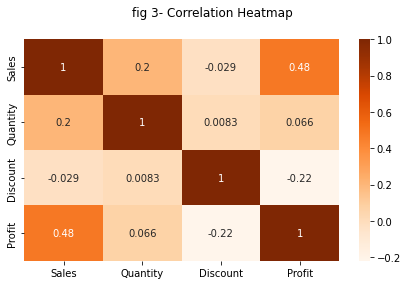

In [16]:
#for easy readablity for biggners
cmap=clean_data.drop(["Unit Price","Unit Profit"],axis=1)
cmap["Profit"]=cmap["Profit"]
sns.heatmap(cmap.corr(), cmap = 'Oranges' ,annot = True)
plt.suptitle("fig 3- Correlation Heatmap")
plt.tight_layout()

We can clearly see that "Sales" and "Discount" have a direct impact on our "Profit," with Sales showing a [positive correlation](https://www.investopedia.com/terms/p/positive-correlation.asp) and Discount showing a [negative correlation](https://www.investopedia.com/terms/n/negative-correlation.asp) ,respectively. This is expected because as sales rise, profits rise as well, and as discounts are offered on sales, profit margins fall.

Additionally, we can see that there is a positive correlation between "Sales" and "Quantity," which also makes sense because the more quantity, the greater the amount of sales, but this correlation appears to be weak.

We can also observe that there is little to no difference in sales and quantity due to discounts, proving that the discount strategy is ineffective for certain items. As a result, Superstore needs to rethink its strategies for luring customers.

In [17]:
fig = px.scatter(clean_data,x="Profit",y="Sales",color="Discount",
                 size="Quantity",symbol="Segment",title="How diffrent factors affects Superstore's sales ")
fig.update_layout(height=600, width=800,
                  legend=dict(yanchor="top", y=0.99, 
                              xanchor="left", x=0.01))
fig.show()

* **Discount**

>The fact that **higher sales with lower discounts created less loss than lower sales with larger discounts**, this indicates that discount definitely plays a major part in the Superstore's loss.

> The scatter plot depicts the same picture as the heat map, making it evident that the **majority of sales that generated profits had discounts of less than 40%.**

* **Sales**

> The majority of sales are saturated below 5,000 sales, and they get much more saturated below 2.5k, meaning that our store has more casual customers who visit frequently to buy a few products rather than buying everything at once.

 >It can also be interpreted as [**Consumer Buying Power**](https://smallbusiness.chron.com/consumer-buying-power-68682.html) is less
 >According to Saylor Academy, consumer power is affected by the economy and inflation. For example, when prices rise as a result of economic trends, consumers have less buying power because the same product may cost more. As a result, a consumer may become more frugal with their spending habits and think twice about buying a new product or service.

 >For a small business, understanding consumer buying power can help determine how to price individual products and services. If your demographic has lower consumer buying power, for example, it’s likely they will be looking for low-priced products and services. If they have higher consumer buying power, they can likely spend more money on the same products and services.

---

Let's isolate the loss-contributing sales record to a separate Dataframe before continuing with the analyses.

In [18]:
clean_data_loss = clean_data[clean_data.Profit<0].rename(columns={"Profit":"Loss"})
clean_data_loss.head()

Ship Mode      Segment             City         State   Region  \
3   Standard Class     Consumer  Fort Lauderdale       Florida    South   
14  Standard Class  Home Office       Fort Worth         Texas  Central   
15  Standard Class  Home Office       Fort Worth         Texas  Central   
23    Second Class     Consumer     Philadelphia  Pennsylvania     East   
27  Standard Class     Consumer     Philadelphia  Pennsylvania     East   

           Category Sub-Category      Sales  Quantity  Discount       Loss  \
3         Furniture       Tables   957.5775         5      0.45  -383.0310   
14  Office Supplies   Appliances    68.8100         5      0.80  -123.8580   
15  Office Supplies      Binders     2.5440         3      0.80    -3.8160   
23        Furniture       Chairs    71.3720         2      0.30    -1.0196   
27        Furniture    Bookcases  3083.4300         7      0.50 -1665.0522   

    Unit Price  Unit Profit  
3     191.5155     -76.6062  
14     13.7620     -24.7716  
15      0.8480      -1.2720  
23     35.6860      -0.5098  
27    440.4900    -237.8646

### 5.3 Does offering a discount boost sales? <a class="anchor" id="5.3"></a>


In [19]:
sales_discount=clean_data
sales_discount['whether_discount'] = sales_discount.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = sales_discount.groupby(['whether_discount']).mean()

def discount_plotter(data_type = 'total'):
    """Plots discount data related plots.
    Args:
        data_type- 'total' or 'average', depending on you want the average statistics or total stats.
    """
    color = ['rgb(107,44,107)', 'rgb(236,140,108)']
    if data_type == 'average':
        discount_data = sales_discount.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = sales_discount.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color),
            row=1, col=1
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data["Unit Price"], marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()
    

discount_plotter('average')
discount_plotter()

**Observations from the above given plots-**
> * Average and overall sales suggest that when something is selling for less, **people prefer to buy more of it. As opposed to **USD 226 on an undiscounted price**, **an average sale at a discounted price** is of about **USD 232**.
> * On average, a discounted sale causes a loss of about USD 6 compared to a profit of about USD 66 on a regular sale. A total **profit of about USD 320K on non-discount sales** was achieved by the corporation, as opposed to a **loss of about USD 34K on discounted sales**.
> * The **average price** of a discounted item is approximately **62 USD**, whereas the same figure is approximately **58 USD** for a non-discounted item.

Considering both average and total sales quantities, **customers tend to buy more products when there are discounts**. Although the average quantity in a sales transaction that includes discounted products is 3.77 **as compared to a higher 3.81 where there are no discounts, the total difference amounts to a notable 1.3k of additional products sold when there are discounts**.

Discounts, however, will impact revenue. **A sales transaction that contains discounted products will result in a loss of 7 USD as opposed to a gain of 67 USD in profits if there are no discounts**. On average, the sale of a discounted product results in a loss of 1 USD as opposed to a gain in profits of 18 USD for a non-discounted product. When discounts are there, there are overall losses of 35k USD as opposed to a profit of 321K USD when discounts are absent. Despite this, the Superstore is compelled to offer discounts on its goods, particularly during holidays, end-of-season sales, and clearance sales that free up room in their warehouses for fresher and more up-to-date inventory. Superstore is advised to decrease total discount instead.
Superstore is suggested to focus on creating various promotional techniques to assure rising profitable sales and steady future gains in long-term customers rather than boosting overall discount levels to minimise losses.

---
One thing to keep in mind is that even though the superstore is losing money by offering discounts on its products, they are unable to stop. The majority of the steep discounts are offered around holidays, end-of-season, and clearance sales, which are essential for the retailer to make room in their warehouses for new inventory. Additionally, the business profits in the future by gaining more loyal clients as a result of its minor losses. As a result, the modest discounts losses are a crucial aspect of the company's operations.
___

### 5.4 Average Profit / Loss and discount across "Category" and "Sub-Category" <a class="anchor" id="5.4"></a>


Now let's explore data at the micro level rather than the big level. We were able to retrieve the key information from our data in the form of a table by using the "Describe" function. Now, let's create the chart for understanding various questions from each area one at a time, beginning with Understanding how profit and loss are produced by category and subcategory in terms of pricing variation

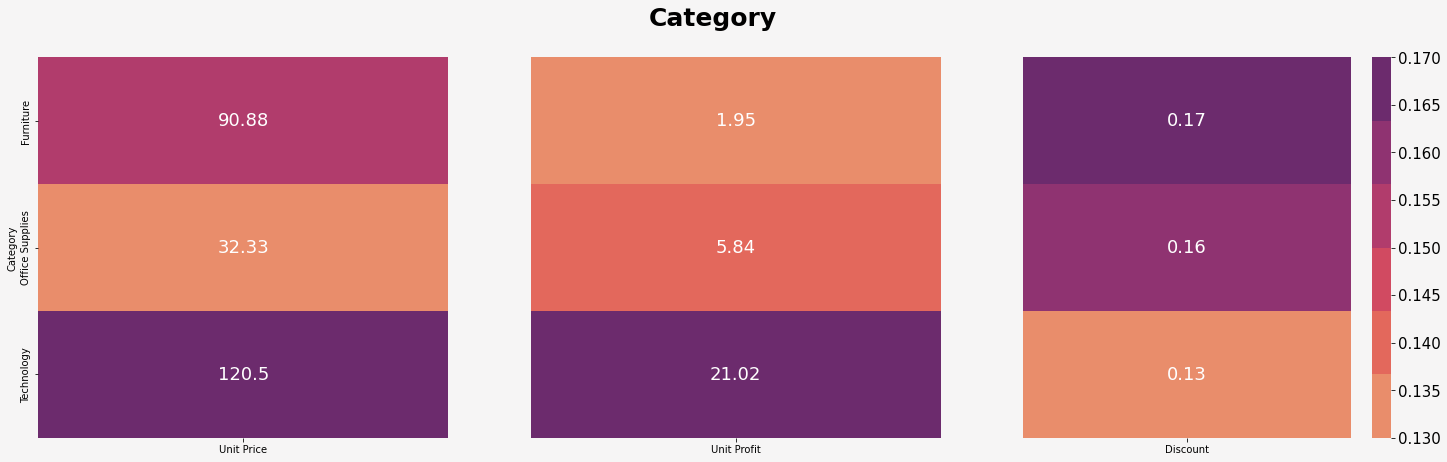

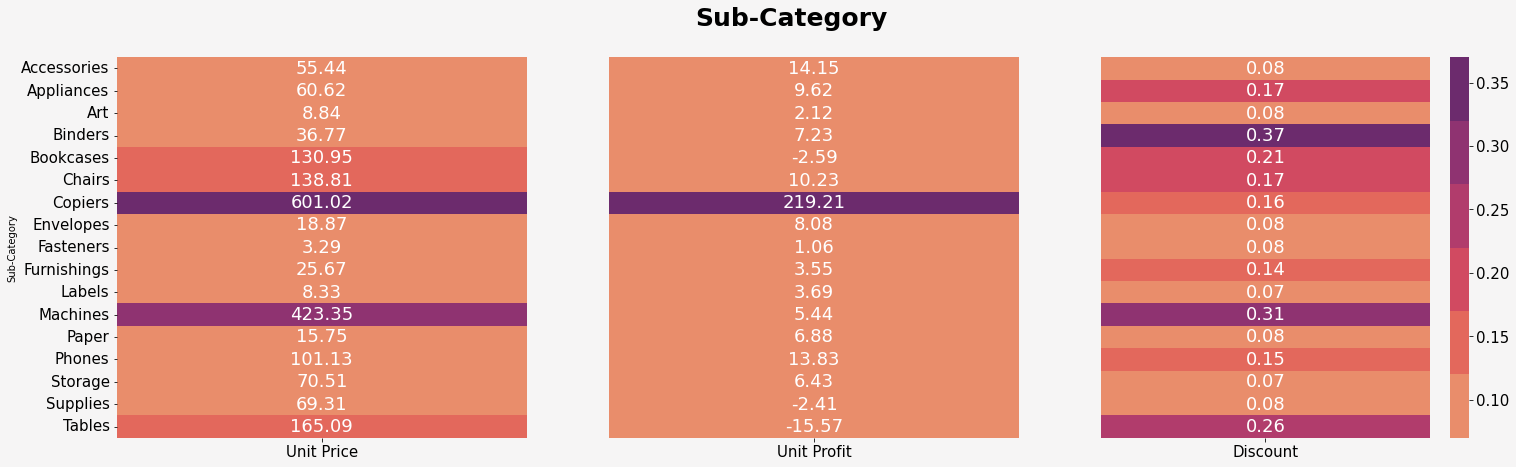

In [20]:
columns=["Category","Sub-Category"]
for column in columns:
    data_=clean_data.groupby(column)["Unit Price","Unit Profit","Discount"].mean().round(2)
    fig, ax = plt.subplots(1, 3, figsize = (25, 7))
    fig.patch.set_facecolor('#f6f5f5')
    fig.suptitle(column, fontsize = 25,weight="bold")        
    ax_index = 0
    plt.rc('ytick', labelsize=15) 
    plt.rc('xtick', labelsize=15)
    for plots in ["Unit Price","Unit Profit","Discount"]:
        plot_frame=data_.reindex(columns=[plots])
        if ax_index==2:
            sns.heatmap(plot_frame, ax=ax[ax_index], cbar=True, annot=True, fmt='2', annot_kws={'size':18},cmap=palette_color)
        else:
            sns.heatmap(plot_frame, ax=ax[ax_index], cbar=False, annot=True, fmt='2', annot_kws={'size':18},cmap=palette_color)
        
        
        if ax_index!=0:
            ax[ax_index].set(ylabel="")
            ax[ax_index].yaxis.set_visible(False)

        ax_index+=1

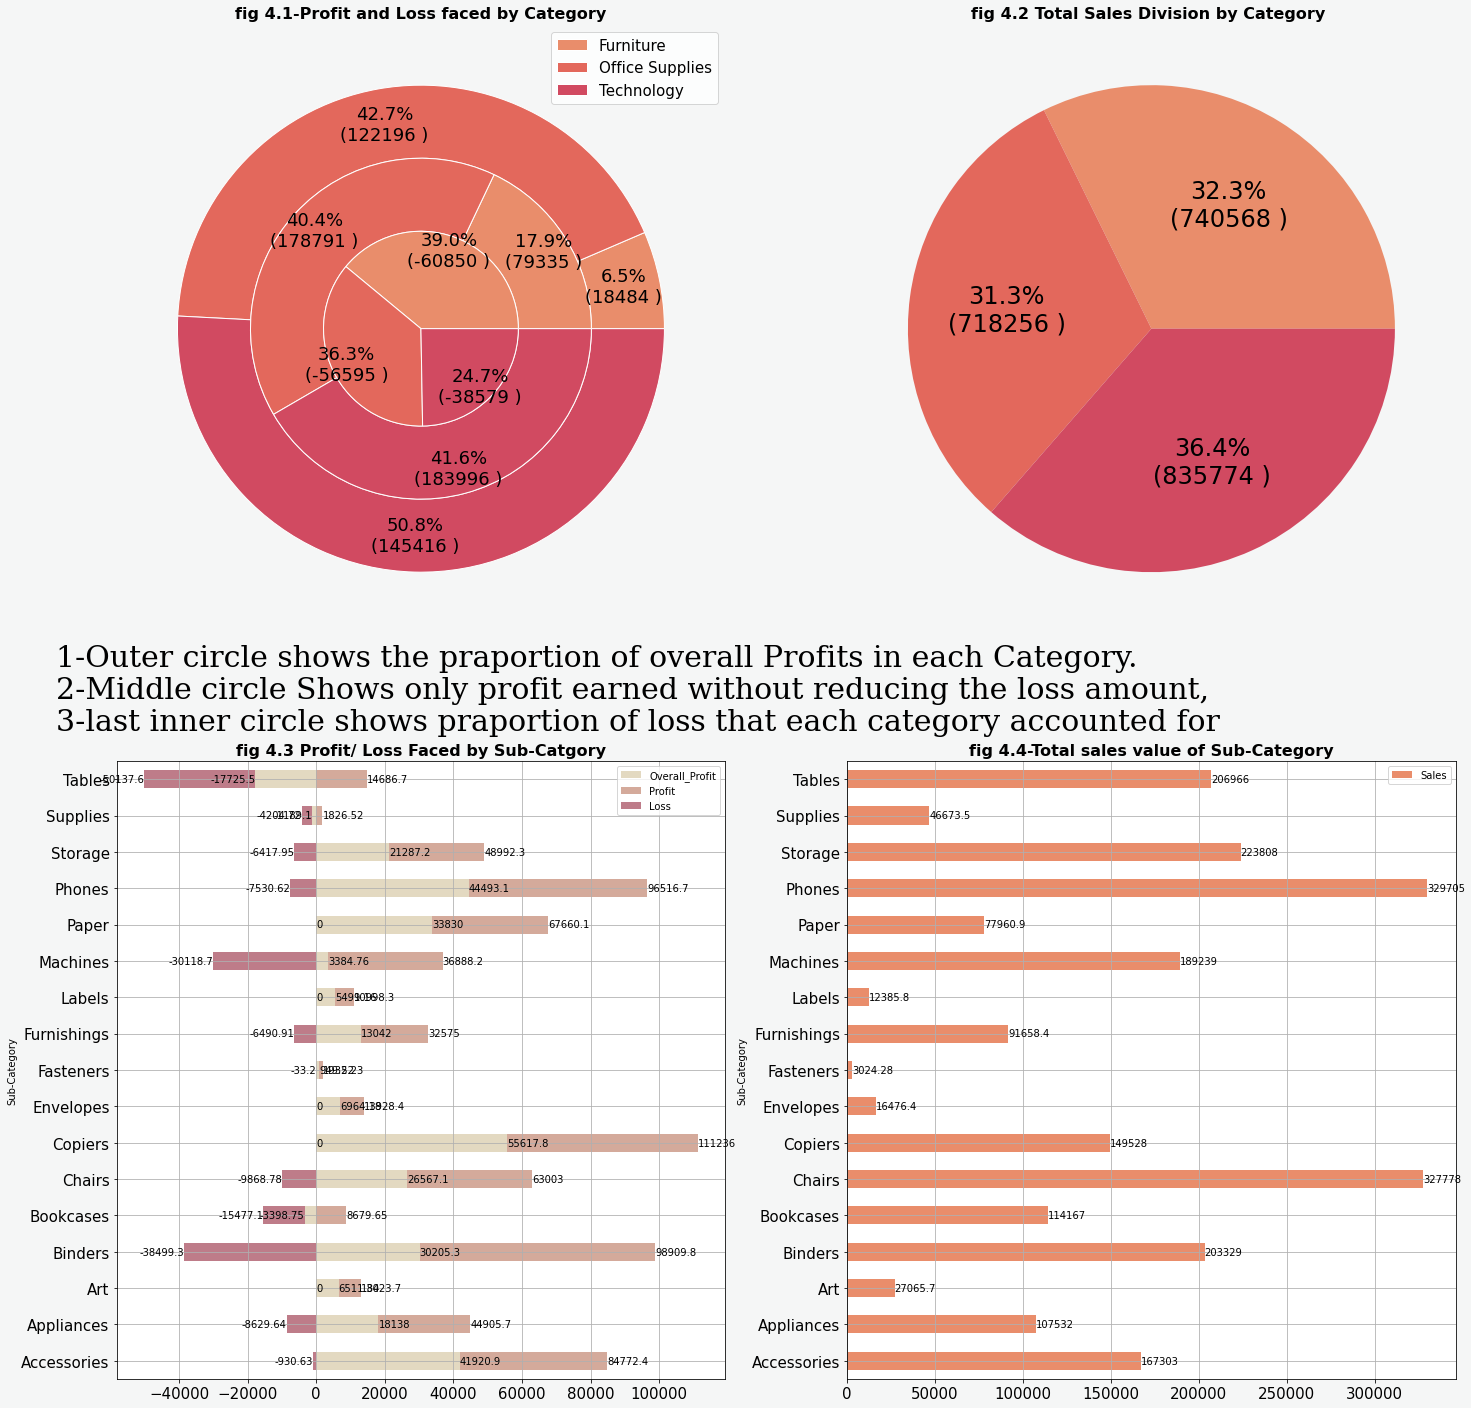

Empty DataFrame
Columns: [(Furniture, Bookcases), (Furniture, Chairs), (Furniture, Furnishings), (Furniture, Tables), (Office Supplies, Appliances), (Office Supplies, Art), (Office Supplies, Binders), (Office Supplies, Envelopes), (Office Supplies, Fasteners), (Office Supplies, Labels), (Office Supplies, Paper), (Office Supplies, Storage), (Office Supplies, Supplies), (Technology, Accessories), (Technology, Copiers), (Technology, Machines), (Technology, Phones)]
Index: []

In [21]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

cat=clean_data.groupby("Category")["Profit","Sales"].sum()
cat_p=clean_data[clean_data.Profit>0].groupby("Category")["Profit","Sales"].sum()
cat_l=clean_data_loss.groupby("Category")["Loss","Sales"].sum()

sub_cat=clean_data.groupby("Sub-Category")["Profit","Sales"].sum().rename(columns={"Profit":"Overall_Profit"}).round(2)
sub_cat_p=clean_data[clean_data.Profit>0].groupby("Sub-Category")["Profit"].sum().round(2)
sub_cat_l=clean_data_loss.groupby("Sub-Category")["Loss"].sum().round(2)
result_sub = pd.concat([sub_cat, sub_cat_p,sub_cat_l], axis=1)
result_sub.sort_values("Overall_Profit",ascending=True)
result_sub=result_sub.reset_index().fillna(0)
result=result_sub.drop("Sales",axis=1)


fig, axs = plt.subplots(2,2,figsize=(24,25))
plt.gcf().set_facecolor('#f5f6f6')

size=0.3
axs[0][0].pie(cat.Profit,radius=1,colors=palette_color,
             wedgeprops=dict(width=size, edgecolor='w'),
              textprops={'fontsize': 18},
              autopct=  lambda pct: func(pct, cat["Profit"]),
             pctdistance=(1-size/2))

axs[0][0].pie(cat_p.Profit,radius=1-size,colors=palette_color,
             wedgeprops=dict(width=size, edgecolor='w'),
              textprops={'fontsize': 18},
             autopct=  lambda pct: func(pct, cat_p["Profit"]),
             pctdistance=(1-size/2))

axs[0][0].pie(cat_l.Loss*-1,radius=1-size-size,colors=palette_color,
             wedgeprops=dict( edgecolor='w'),textprops={'fontsize': 18},
             autopct=  lambda pct: func(pct, cat_l["Loss"]),
             pctdistance=(1-size/2))

axs[0][0].legend(cat.index,fontsize=15)
axs[0][0].text(-1.50,-1.65, "1-Outer circle shows the praportion of overall Profits in each Category.\n2-Middle circle Shows only profit earned without reducing the loss amount,\n3-last inner circle shows praportion of loss that each category accounted for  ",{'font':'serif', 'size':30, 'weight':'normal'})
axs[0][0].set_title('fig 4.1-Profit and Loss faced by Category',fontsize=16,weight='bold')
axs[0][1].pie(cat.Sales,colors=palette_color,
              autopct=  lambda pct: func(pct, cat["Sales"]),
             textprops={'fontsize': 24})

axs[0][1].set_title('fig 4.2 Total Sales Division by Category ',fontsize=16,weight='bold')

result.plot(x="Sub-Category",kind = 'barh',color = sns.color_palette("ch:s=-.2,r=.6"), ax=axs[1][0],stacked=True)
result_sub[["Sub-Category","Sales"]].plot(x="Sub-Category",kind = 'barh',color = palette_color, ax=axs[1][1])
axs[1][0].set_title('fig 4.3 Profit/ Loss Faced by Sub-Catgory',fontsize=16,weight='bold')
axs[1][1].set_title('fig 4.4-Total sales value of Sub-Category',fontsize=16,weight='bold')
axs[1][1].grid()
axs[1][0].grid()
for i in axs[1][0].containers:
            axs[1][0].bar_label(i,)
for i in axs[1][1].containers:
            axs[1][1].bar_label(i,)

plt.show()


tbl=clean_data.groupby(["Category","Sub-Category"]).count().reindex(columns=[])
tbl.T

### **Observations**

**1. Technology :-**

>* **The average unit price for the technology category is the highest at 120.5 USD per item**, and the average profit per unit is the highest at 21.02 USD. These two elements suggest that the tech industry has the highest profit margin.
>
>
>* **This category creates the most overall profit of 145.4k USD, or 50.8% of the total profit earned by superstores**, as well as the most sales, which make up around 36.4% of superstore sales. Due to shifting consumer preferences toward cutting-edge technologies, this industry is predicted to expand quickly in the next years.
>
>
>* Additionally, **the "Technology" category offers the lowest average discount of 13% of all the categories**
>
>
>* **The clear least popular category is technology**. This could be due to the fact that it is the most expensive Category and that more expensive materials and specialised labour are needed throughout the manufacturing process..
>
>* **This Category has the highest overall sales and profits**
>>
>>
>> **Its Sub-Category:**
>>
>>
>>* **Due of its conspicuously high sales and paltry revenues, "machines" have the lowest profit margins**. This may be because it has the second-highest average discounts, at 30%, and is the key factor in the category's greatest loss, amounting to 30.1k USD, or more than 50% of the loss. category's loss.**
>>
>>
>>
>>* **The biggest sales in this categoryi is of "phones" indicate that they are well-liked by consumers. .
>>
>>
>>* **Copiers are the least preferred.** This might be due to the fact that they are very expensive compared to all the other products available, with a per-unit pricing of 601.2 USD and a very high per-unit profit value of 219 USD.
>>
>>
>>* **Accessories, which cost an average of 55 USD per item, are the most affordable.**
>>
>
>
**2. Office Supplies :-**
>
>
>* **Obviously, the least expensive category is office supplies**. The majority of the things in this category are compact and widely accessible at numerous other places.
>
>
>
>* The most popular category is undoubtedly office supplies. This might be due to the fact that Offie Supplies generate 42.7% of Superstores' overall profit, cost less, and deplete more quickly than the other products.
An average discount of 16% is offered on all sales in this category.
>
>
>* In this category an average discount 16% is provided accross the sales.
>
>
>> **Its Sub-Category**
>>
>>
>>* **Storage and supplies are the most expensive items in this Category** having an average unit price around 68-75 USD.
>>
>>
>>* **Fasteners are the least expensive at less than 5USD**. generating profit of 1.8USD/Per unit
>>
>>
>>* **Binders are the most popular in this category having total sales over 2,00,000USD**,At the same time this category and as well as **SuperStore face most of it losses from this item**. as Binder's are positioned at 2nd highest loss casing item at Superstore, **around 24.6% of Superstores loss and 68% of this category's loss is caused by Binders.** **Binders have the highest average discounts of around 37.5%**, which lowers its profitability in terms of both profits and profit margins.
>>
>>
>>* all sub-categories under Office supplies have good profit margins.
he reason behind the previous point may be because, most sub-categories have an average discount of under 10%. The Office Supplies Category has the lowest discounts.
>
>
**3. Furnitures :-**
>
>
>* **Among all categories this category has Lowest average profit generation** per unit which is only 1.95USD.
>
>
>* **This Category Generates around 18% Profit**, But it only generates 6.5% overall profits, it is because the amount of profit margin is really low and at the same time **this category is also responsible for 39% of total loss faced by Superstore.**
>
>
>* Even after Having the minimum profit margin, **Furniture Caategory also overs the highest average discount of 17%**
>
>> **Its Sub_Category**
>>
>>
>>* Tables, chairs, and bookcases are the more expensive Furniture as their average unite Price ranges between 130USD and 160USD.
>>
>>
>>* **Chair Has the highest sales at Superstore** and is also responsible for **generating the most profits in this category** despite giving out relatively high average discounts of almost 17.5%.
>>
>>
>>* **Table has an average profit price of -15.67 USD**, even having the High sales value most of its sales results in loss, which is more then its purchasing value making this Sub-category a fail. **it also it offers the third highest average discount of above 25%.**
>
>
---

### 5.5 Buyers diversity in "Ship Mode"  <a class="anchor" id="5.5"></a>

The **shipping mode** is a way of shipping goods. More specifically, a shipping mode is the combination of a shipping carrier and the shipping service that is offered by that carrier.
as we know our SuperStore offers 4 shipping Modes - "Standard Class", "First Class", "Second Class", "Same Day", Respectivly.

Let us now understand few Questions about this feature such as -

**1. Which Ship Mode is most popular among buyers?**

**2. Which Segment uses which mode most?**

**3. Does the number or kind of an item affect the buyer's preference for shipping?**

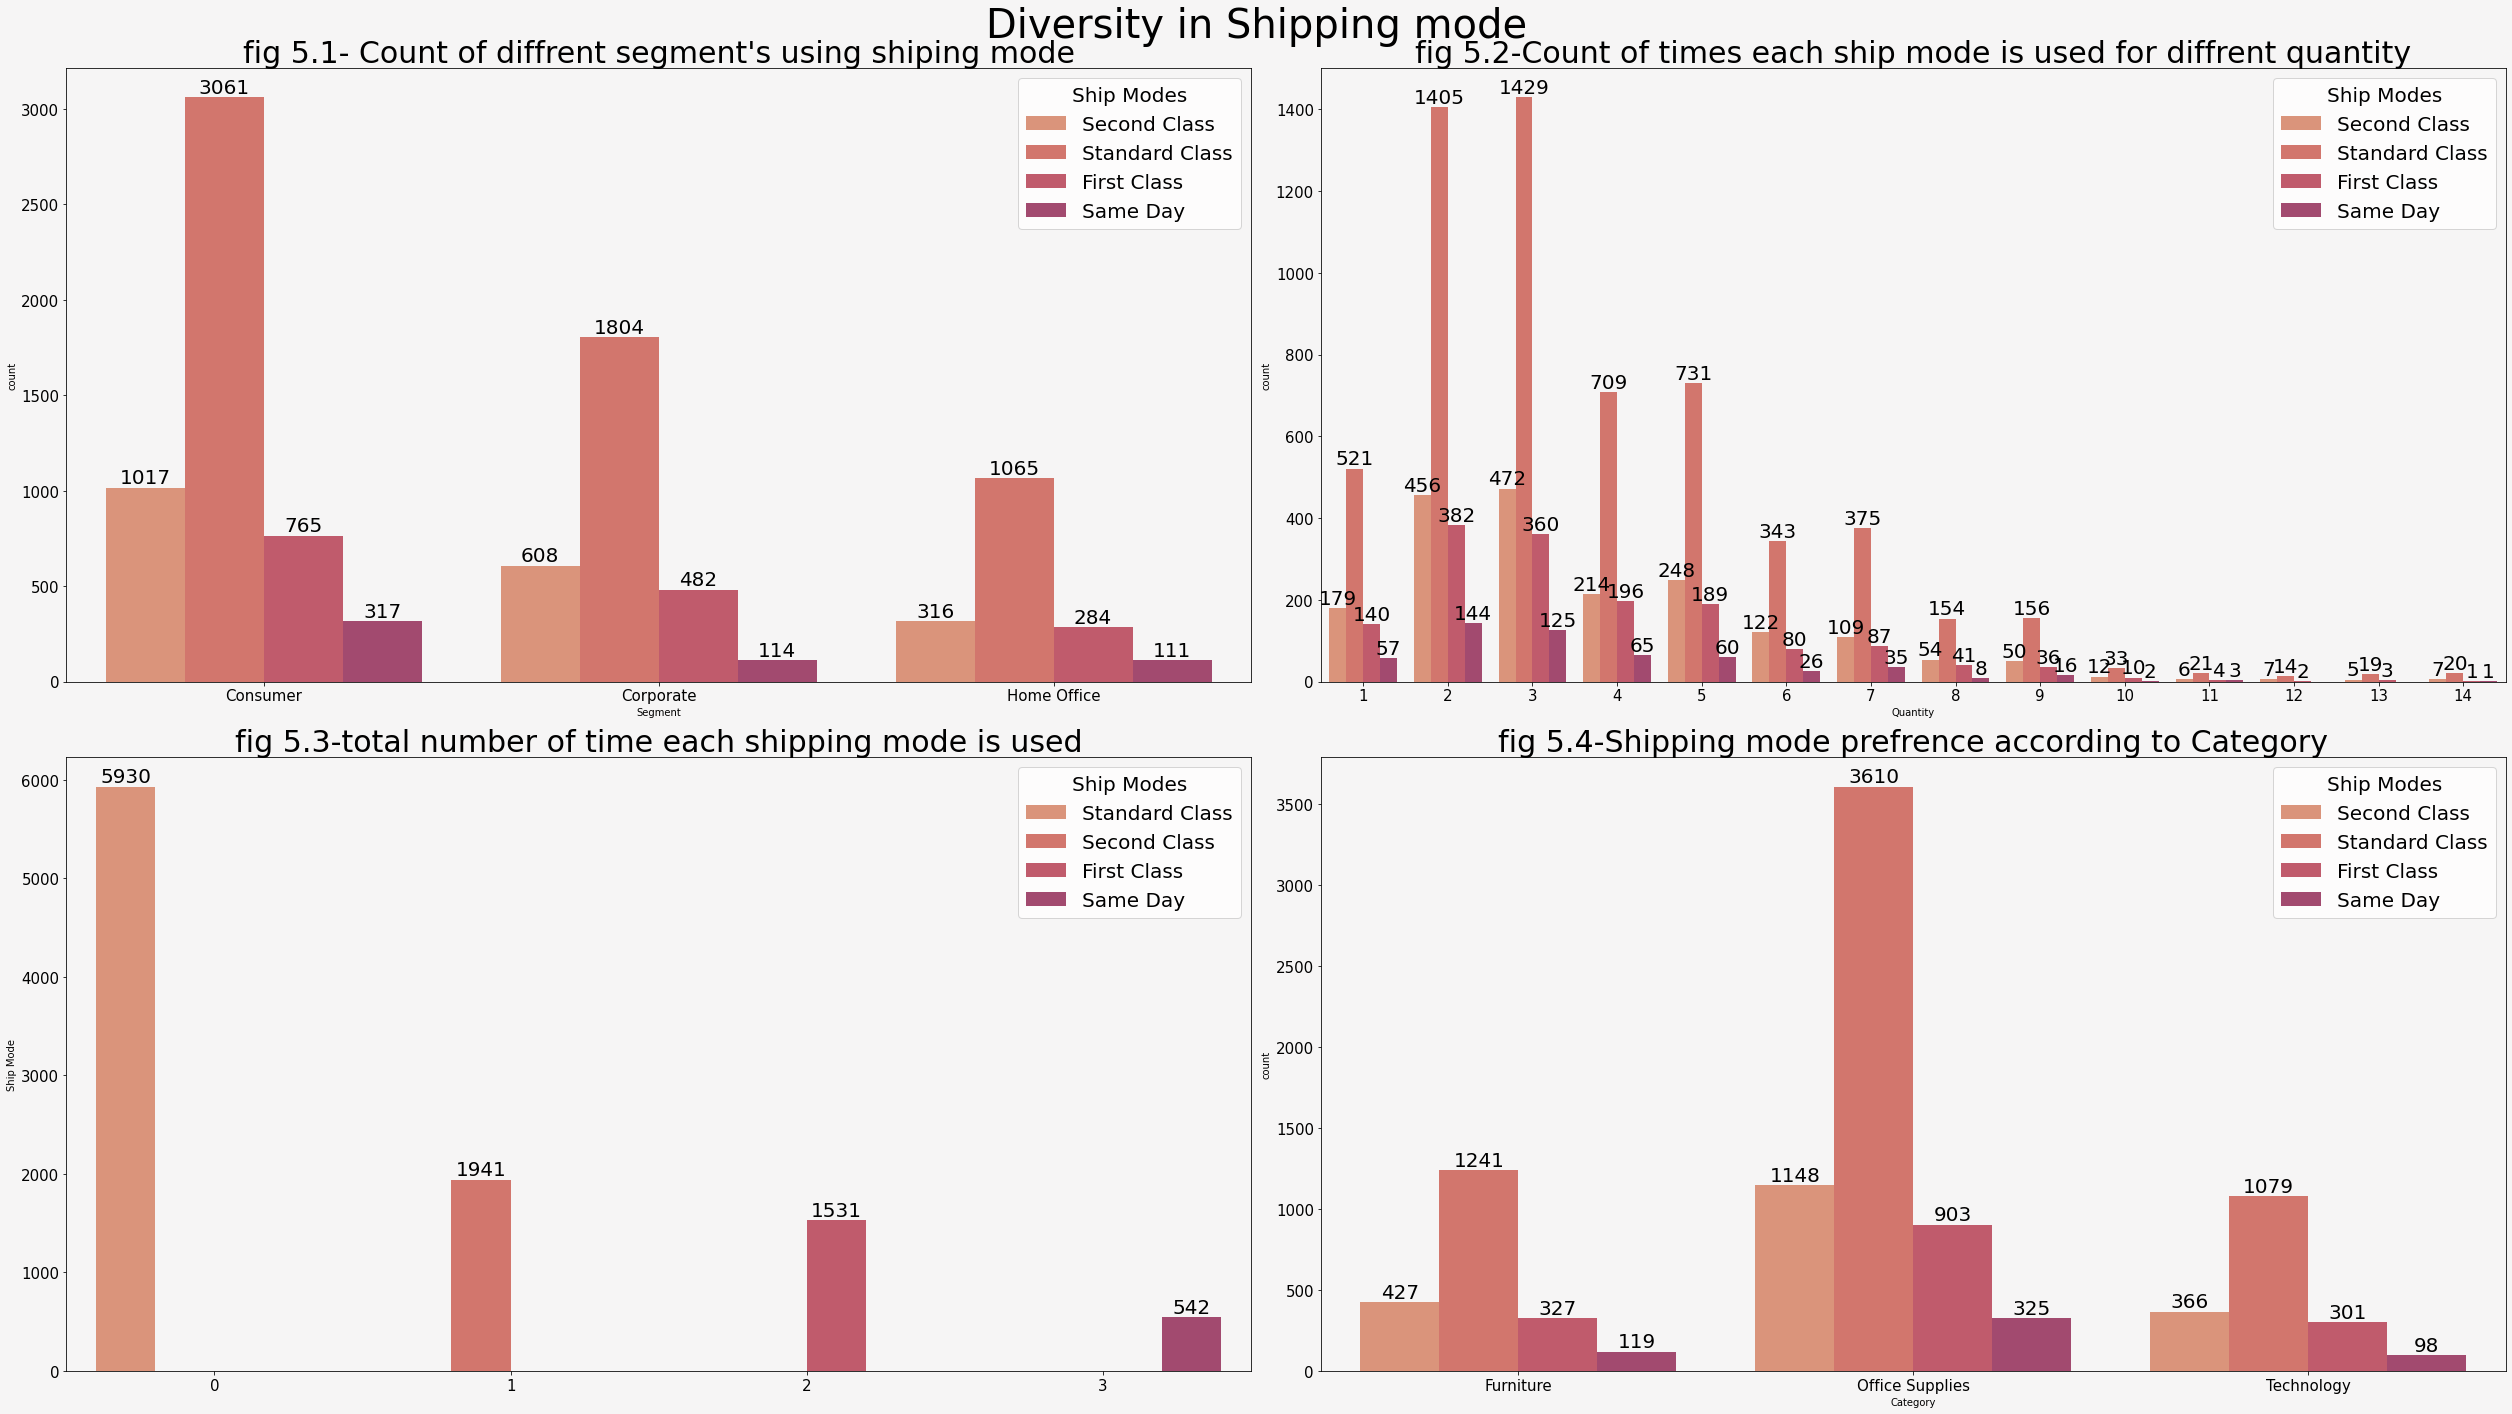

In [22]:
ship=ship=clean_data["Ship Mode"].value_counts().reset_index()
fig, axs = plt.subplots(2,2,figsize=(35,20))
fig.patch.set_facecolor('#f6f5f5')
sns.countplot(data=clean_data, x = "Segment",hue="Ship Mode", palette=palette_color,ax=axs[0][0])
sns.countplot(data=clean_data, x = "Quantity",hue="Ship Mode", palette=palette_color,ax=axs[0][1])
sns.barplot(data=ship, x = ship.index,y="Ship Mode",hue="index", palette=palette_color,ax=axs[1][0])
sns.countplot(data=clean_data,x="Category",hue="Ship Mode", palette=palette_color,ax=axs[1][1])
 
axs[0][0].set_title("fig 5.1- Count of diffrent segment's using shiping mode",fontsize=30)
axs[0][0].set_facecolor('#f6f5f5')

axs[0][1].set_title("fig 5.2-Count of times each ship mode is used for diffrent quantity",fontsize=30)
axs[0][1].set_facecolor('#f6f5f5')

axs[1][0].set_title("fig 5.3-total number of time each shipping mode is used",fontsize=30)
axs[1][0].set_facecolor('#f6f5f5')

axs[1][1].set_title("fig 5.4-Shipping mode prefrence according to Category",fontsize=30)
axs[1][1].set_facecolor('#f6f5f5')

for m in range(2):
    for n in range(2):
        axs[m][n].legend(fontsize = '11',
           title = 'Ship Modes', title_fontsize = '20',
           prop={'size': 20},
           loc="upper right")
        for i in axs[m][n].containers:
            axs[m][n].bar_label(i, fontsize=20)
            
            
plt.suptitle("Diversity in Shipping mode",fontsize=40)



plt.tight_layout()

> When organising the shipping process, the mode of transportation is crucial. In addition to prices, the type of transportation should be chosen after considering the urgency of the cargo, the value of the products being delivered, their size, and their weight. Since the mode of delivery is entirely dependent on consumer preferences, it is not possible to link the mode of shipping to revenue or sales.

**1. Which Ship Mode is most popular among buyers?**

>* As we can see in fig. 2.3, **the "Standard Class" mode of shipping is the most preferred** among all the shipping modes, with almost 60% of the items purchased from Supershop preferring to be shipped using this mode. "Second Class" and "First Class" are followed, with only 410 orders separating them, and **"Same Day" Mode is the least preferred mode of shipping.**
>
>
>* As previously indicated, each mode has a different cost according to the different services it offers. This explains why most customers prefer the regular mode, which is the less expensive option, while "same day," which has a considerably higher price tag, receives fewer orders.

**2. Which Segment favours which Ship mode the most?**

>* As depicted *(in fig 2.1)* "Standard Class" is most Prefered by all Segments of our Supershops apart from that we cannot find diffrent favourism of any ship mode by any specific segment 

**3.  Does the number or kind of an item affect the buyer's preference for shipping?**
> according to (fig 2.2& fig 2.4) Quantity or types of items doesn't have any much affect on the choice of Shipping mode.
the **praportion of orders shipped using each mode among three categories are similar.** 

---


next let us head towards our next big category that is Regions

### 5.6  Superstores Regions Based Report   <a class="anchor" id="5.6"></a>

As we know our SuperStore is spread across 4 regions of United States Namely- "Central", "East", "South", and "West". 
now using our dataset lets find most important things such as:

**1. Which region's superstore makes the most money?**

**2. Which Region Has Seen the Most Superstore Losses?**

**3. Which Region's Supermarket Has the Highest and Lowest Sales?**

**4. Does the cost per unit for the same products or subcategories differ by region?**

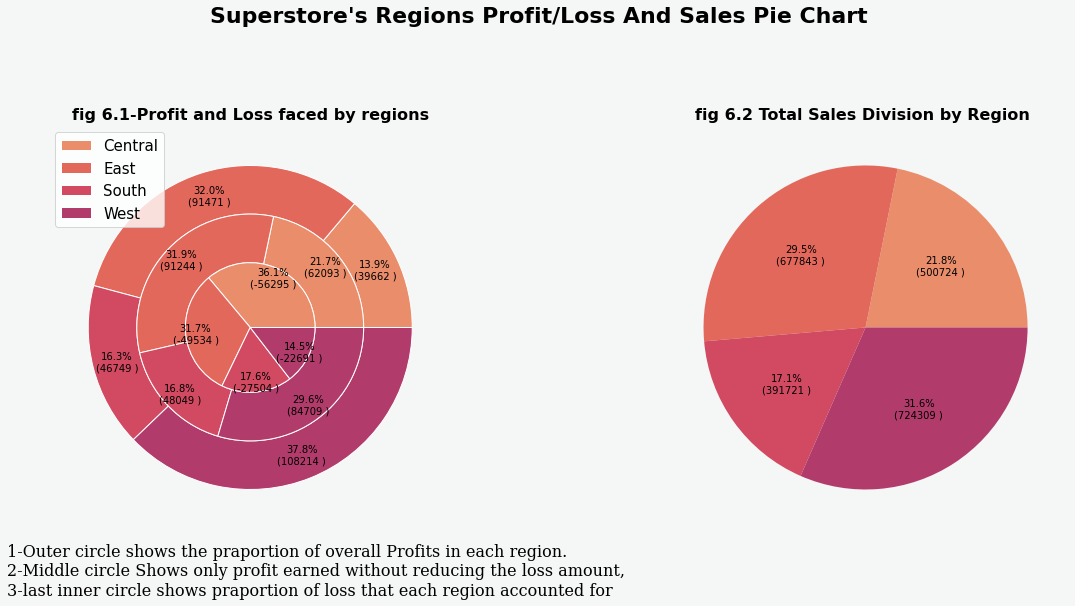

In [23]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

reg=clean_data.groupby("Region")["Profit","Sales"].sum()
reg_p=clean_data[clean_data.Profit>0].groupby("Region")["Profit","Sales"].sum()
reg_l=clean_data_loss.groupby("Region")["Loss","Sales"].sum()
reg_cat=clean_data.groupby(["Region","Category"])["Unit Price"].mean().reset_index()

fig, axs = plt.subplots(1,2,figsize=(15,9))
plt.gcf().set_facecolor('#f5f6f6')

size=0.3
axs[0].pie(reg.Profit,radius=1,colors=palette_color,
             wedgeprops=dict(width=size, edgecolor='w'),
              autopct=  lambda pct: func(pct, reg["Profit"]),
             pctdistance=(1-size/2))

axs[0].pie(reg_p.Profit,radius=1-size,colors=palette_color,
             wedgeprops=dict(width=size, edgecolor='w'),
             autopct=  lambda pct: func(pct, reg["Profit"]),
             pctdistance=(1-size/2))

axs[0].pie(reg_l.Loss*-1,radius=1-size-size,colors=palette_color,
             wedgeprops=dict( edgecolor='w'),
             autopct=  lambda pct: func(pct, reg_l["Loss"]),
             pctdistance=(1-size/2))

axs[0].legend(reg.index, fontsize=15)
axs[0].text(-1.50,-1.65, "1-Outer circle shows the praportion of overall Profits in each region.\n2-Middle circle Shows only profit earned without reducing the loss amount,\n3-last inner circle shows praportion of loss that each region accounted for  ",{'font':'serif', 'size':16, 'weight':'normal'})
axs[0].set_title('fig 6.1-Profit and Loss faced by regions',fontsize=16,weight='bold')

axs[1].pie(reg.Sales, colors=palette_color,
              autopct =  lambda pct: func(pct, reg["Sales"]))
axs[1].set_title('fig 6.2 Total Sales Division by Region ', fontsize=16, weight='bold')

plt.suptitle("Superstore's Regions Profit/Loss And Sales Pie Chart", fontsize=22,weight='bold')


plt.tight_layout()

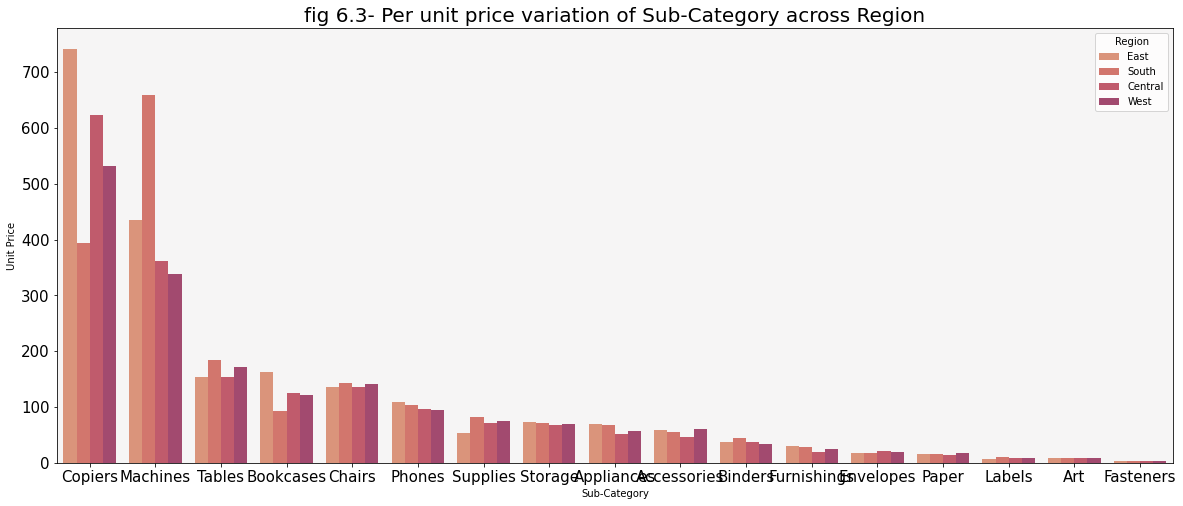

In [24]:
reg_cat=clean_data.groupby(["Region","Sub-Category"])["Unit Price"].mean().reset_index().sort_values("Unit Price",ascending=False)

fig,axs =plt.subplots(figsize=(20,8))
p = sns.barplot(data = reg_cat, x ="Sub-Category", y = "Unit Price",hue="Region", palette=palette_color)
plt.title("fig 6.3- Per unit price variation of Sub-Category across Region", fontsize=20)
axs.set_facecolor('#f6f5f5')

**1. Which region's superstore makes the most money?**

>* This Pie Chart makes evident the differences that result from the failure to segregate data that I mentioned [earlier](#earl). When we look at **the "Overall Profit" that each region's superstores created, it is clear that the West Region's superstores generated the most overall earnings**, with 108k USD alone accounting for about 40% of the superstores' overall profit.

>* However, when we look at which **region produces the most profits, it shows that the "East Region" generates 91k USD (roughly 32%) of the total profit.

>* "**while "Central region" can be seen as producing the least overall profit (of 39k/13.9%) among the four regions**, and when only looking at profit contribution, the "South Region" has the least contribution of any region.

**2.  Which Region Has Seen the Most Superstore Losses?**

>* It is obvious that **"Central Region's" Superstores have contributed the majority of losses, amounting to 56.2k USD, or 36.1% of all losses incurred by SuperStore**. As a result, this region's overall profit was significantly reduced; even though it had previously generated around 21.7% of profit after losses were taken into account, it now only generates 13.9% of profit.

**3. Which Region's Supermarket Has the Highest and Lowest Sales?**

>* There are no particular regions that are performing worse than others in terms of generating sales, as evidenced by the total amount of sales that were generated.

>* However, when we look at the percentage of total sales produced, **we can see that Superstores in the "West Regions" are bringing in the most money, roughly 31.6% or 724k USD**

>* Superstores in the **South have the lowest sales ratio out of the four regions.**

**4. Does the cost per unit for the same products or subcategories differ by region?**

>* According to economic theory, the price of a commodity in one country should also be the same in other countries. For this to be possible, this theory assumes that all other factors should be kept constant. In other words, the assumptions include having *no transaction costs, no transportation costs, no legal restrictions*, same currency exchange rates, and no price manipulation by buyers or sellers. This theory is also known as the law of one price." 

>* however, in reality The price discrepancy may be caused by the expense of delivering goods from the main store to satellite locations, local taxes, or the willingness of consumers to pay.

>* Prices also change depending on demand, such as if a product is exclusive to a market or competes with many rivals there.
It's reasonable to believe that Sales and Discounts may also be to blame for this variety in prices from region to region. The Superstore needs to keep these pricing differences to a minimum to keep its consumers loyal.

---

### 5.7 Profit/ Loss, Sales and Discounts diversity by States!<a class="anchor" id="5.7"></a> 

Now We're going to dive into the state wise analysis:

1. We're going to see the sales in every state
2. We're going to see the Loss ccured in every state
3. We're also going to if the state which causes the most is also causing more loss in average?
4. We're going to give the discounts given off in every state

In [25]:
state_s=clean_data.groupby(["State","City","Category","Sub-Category"])["Sales"].sum().reset_index()
fig = px.treemap(state_s, path=["State","City","Category","Sub-Category"], values='Sales',
                  color='Sales',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(state_s['Sales'], weights=state_s['Sales']),
                title="Fig 4.1-Total State/City X Sales With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [26]:
state_profit=clean_data[clean_data.Profit>0]
state_profit=state_profit.groupby(["State","City","Category","Sub-Category"])["Profit"].sum().reset_index()
fig = px.treemap(state_profit, path=["State","City","Category","Sub-Category"], values='Profit',
                  color='Profit',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(clean_data['Profit'], weights=clean_data['Profit']),
                title="Fig 4.2-Total State/City X Profit With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [27]:
clean_data_loss["Loss"]=clean_data_loss["Loss"]*-1
state_loss=clean_data_loss.groupby(["State","City","Category","Sub-Category"])["Loss"].sum().reset_index()
fig = px.treemap(state_loss, path=["State","City","Category","Sub-Category"], values='Loss',
                  color='Loss',
                  color_continuous_scale='RdBu_r',
                  color_continuous_midpoint=np.average(state_loss['Loss'], weights=state_loss['Loss']),
                  title="Fig 4.3-Total State/City X Loss With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [28]:
# total Sales for each State
state_d = clean_data.groupby(["State","City","Category","Sub-Category"])['Discount'].mean().sort_values(ascending = False).reset_index()
state_dr= state_d[state_d.Discount>0]
fig = px.treemap(state_dr, path=["State","City","Category","Sub-Category"], values='Discount',
                  color='Discount',
                  color_continuous_scale='RdBu_r',
                  title="Fig 4.4-Average State/City X Discount  With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [29]:
# total Sales for each State
state_d = clean_data.groupby(["State","City","Category","Sub-Category"])['Discount'].mean().sort_values(ascending = False).reset_index()
state_dr = state_d[state_d.Discount>0]
fig = px.treemap(state_dr, path = ["State","City","Category","Sub-Category"], values='Discount',
                  color ='Discount',
                  color_continuous_scale='RdBu_r',
                  title = "Fig 4.4-Average State/City X Discount  With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False

fig.update_layout(margin = dict(t = 50, l = 25, r = 25, b = 25))
fig.show()

In [30]:
state_q = clean_data.groupby(["State","City","Category","Sub-Category"])['Quantity'].sum().sort_values(ascending = False).reset_index()
fig = px.treemap(state_q, path=["State","City","Category","Sub-Category"], values='Quantity',
                  color='Quantity',
                  color_continuous_scale='RdBu_r',
                  title="Fig 4.6-Total Number of Quantity Sold Across States/City with Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'


fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

**Sales** <a class="anchor" id="Findings"></a> 
>* **There is a Huge Disparty in the number of sales even between top 10 States As well as between Cities**, The company has the **highest sales in the state of California** (as shown in fig. 4.1), selling over 456K USD of Total Sales, which is nearly 20% of the total sales generated by Superstore. Meanwhile, the **2nd ranking State, "New York," generates approximately 310K USD of sales.** Followed by **"Texas" is in third place, creating total sales of 170k USD, and "Virginia" is in tenth place, generating total sales of 70k USD.**
>
>
>* It is evident that California has the highest amount of overall sales even though it is not as saturated as New York. This is due to the fact **that the superstore has the majority of its branches located in this state, with 81 cities having Superstores**.
>
>
>* Between Cities **Superstore is obviously quite popular in "New York City,"** as evidenced by the fact that this city alone generates a total of 255k USD in sales, accounting for 82.4% of the state's overall sales.
>
>
>>* The category that attracts the **most sales in this city is technology**. The three Items with the biggest sales in this city are **"phones," "machines," and "chairs," which together account for 45% of the city's sales**.
>
>>* **FUN FACT: the total sales in the state of New York is more than the sales in all of the Central America combined.**
>
>* **Los Angeles, which ranks as the city with the second-highest sales** contribution at the superstore, comes in second and contributes 175k USD in total sales, or 38% of California's overall sales.
>
>>* Technology is this city's top sales sector, while phones, tables and Accessories are its top selling items.
>

**Profits**
>
>* **California generates the most revenue** for the superstore, producing a profit of 79,9k USD overall. **"New York" came in second**, producing a profit of 78.9K USD, then **"Washington" came in third** with a profit of 33,7K USD.
>
>
>* One of the possible explanations for California's superior sales and profit is that it offers far smaller discounts. This shows how successful California's promotional approach of providing less discounts has been.
>
>
>>In terms of City- Superstore's **most revenue is generated from "New York City" which is 65.9k USD**. 
>
>>In "New York City," the items that generate the most money from the category of technology and office supplies are **"Machines", "Phones" and "Binders" which each make a profit of 14.5k USD, 10.7k USD, and 8.3k USD respectively.**
>
>>**Los Angeles, on the other hand, comes in second place with a profit of 31.4k USD**. The sale of "accessories" provides the highest earnings in this city, with 5.6k, followed by "binders" and "copiers," which each make 3.7k and 3.9k.
>
>
>* **A considerable portion of these even experience loss, with more than half of the states making little to no profit**.

**Loss**
>
>* **Texas, the state with the third-highest sales, ended up costing the company the most, resulting in a loss of more than 36k USD.** Ohio and Pennsylvania come next, ranking as the tenth and eighth states with the highest sales, causing the losses at about 21.7k USD and 21.6k USD, respectively.
>
>
>* Additionally, All This State is among the states with the largest average discounts. providing and average discount over 35%
>
>
>
>* **(As seen in fig. 4.5) The higher the profit-to-sales ratio, the greater the profit returns received by the retailer from the state for each transaction.**.
>
>
>* A lower value on the scales indicates that, in comparison to a state with a greater profit-to-sales ratio, the store must generate much more sales in order to generate the same amount of profit.
>
>
>* States with a red tint or a profit-to-sales ratio of 1-2 indicate that they are losing more money on each transaction.
The retailer can use these insights to determine which state requires more attention than the others.

---

## 6.Conclusion (Act Phase)

Exploratory Data Analysis (EDA) on the dataset "SampleSuperstore" has been given to us, and as company managers, we are to identify the areas that need improvement in order to increase profit.
identifying the weak points in the sales department to increase sales
Based on the information discovered during the data analysis, the following techniques have been suggested.

| Analysis Performed Based on Questions | Findings | Recommendations |
| --- |--- |--- |
| [**How does Sales, Quantity and Discount affects SuperStores Profits?**](#5.2) | **(1)** it can be seen that higher sales with lower discounts created less loss than lower sales with larger discounts, this indicates that discount definitely plays a major part in the Superstore's loss | Even during sales or the holiday season, it is crucial to check the amount of discounts given, and it is advised to keep them at or below 40%. as with more discount give results in companys loss |
||**(2)** The majority of sales are saturated below 5,000 sales, and they get much more saturated below 2.5k | Organising events to foster more interest and enthusiasm |
||||||
| [**Does offering a discount boost sales?**](#5.3) | **1**. Average and overall sales suggest that when something is selling for less, people prefer to buy more of it.| Offering ongoing discount codes may have a negative effect on clients because they may begin to doubt the quality of the products Superstore produces. Consequently, having a rotational sales strategy is advised.|
||**2.** On average, a discounted sale causes a loss of about USD 6 compared to a profit of about USD 66 on a regular sale. A total profit of about USD 320K on non-discount sales was achieved by the corporation, as opposed to a loss of about USD 34K on discounted sales.
||**3** The average price of a discounted item is approximately 62 USD, whereas the same figure is approximately 58 USD for a non-discounted item. | --- |
||||||
| [**Average Profit / Loss and discount across "Category" and "Sub-Category"**](#5.4) | **Technology :-** **(1)** The average unit price for the technology category is the highest at 120.5 USD per item, and the average profit per unit is the highest at 21.02 USD. Techcnology has highest profit margin. | Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products | Concentrate on the Technology subcategory, phones, and chairs because they sell the most and are the most profitable. Combine them with things that are less profitable, such bookcases, tables, and chairs, to balance the losses.|
||**(2)** The category creates the most overall profit of 145.4k USD, or 50.8% of the total profit earned by superstores and Offers the lowest average discount of 12%. 
||**(3)** Due of its conspicuously high sales and paltry revenues, "machines" have the lowest profit margins. | By decreasing the machine's inventory supply and ordering only as needed, the profit margin can be raised. |
||**(4)** he biggest sales in this category is of "phones" indicate that they are well-liked by consumers. Copiers are the least preferred and Accessories, which cost an average of 55USD, are the most affordable.  
||**Office Supplies :- (1)** the least expensive category is office supplies. The majority of the things in this category are compact and widely accessible at numerous other places. 
||**(2)**  Offie Supplies generate 42.7% of Superstores' overall profit, cost less, and deplete more quickly than the other products. An average discount of 16% is offered on all sales in this category. 
||**(3)** "Storage" and "Supplies" are the most expensive  and "Fasteners" are the least expensive items in this Category 
|| **(4)** With total sales above 200k USD, "Binders" are the most popular product in this category. However, SuperStore suffers the majority of its losses from selling this item. As the item with the second-highest loss casing percentage at Superstore, binders are responsible for approximately 24.6% of that store's loss and 68% of the loss in this category.
||**(5)** Office supplies have good profit margins as most of its items have the lowest average discount of under 10%. 
|| **Furnitures :- (1)**  Among all categories this category has Lowest average profit generation per unit which is only 1.95USD. This Category Generates around 18% Profit, But it only generates 6.5% overall profits.| For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price. |
|| **(2)** this category is also responsible for 39% of total loss faced by Superstore. Even after Having the minimum profit margin, Furniture Caategory also overs the highest average discount of 17%.
|| **(3)** Tables, chairs, and bookcases are the more expensive Furniture as their average unite Price ranges between 130USD and 160USD.| --- | 
||||||
| [**Buyers diversity in "Ship Mode"**](#5.5) |  **1. Which Ship Mode is most popular among buyers?** :-  the "Standard Class" mode of shipping is the most preferred, as almost 60% of the items purchased from Supershop preferring to be shipped using this. and "Same Day" Mode is the least preferred mode of shipping. |     --- |
|| **2. Which Segment favours which Ship mode the most?** :- we cannot find diffrent favourism of any ship mode by any specific segment, but "Standard Class" is most Prefered by all Segments
||  **3. Does the number or kind of an item affect the buyer's preference for shipping? :-** praportion of orders shipped using each mode among three categories are similar.| ---|
||||||
| [**5.6 Superstores Regions Based Report**](#5.6) | **1. Which region's superstore makes the most money? :-** The most overall profit was generated from "West Region", However when we look in terms of only profit generation then its "East Region". | - -|
||**2. Which Region Has Seen the Most Superstore Losses? :-** "Central Region's" Superstores have contributed the majority of losses, amounting to 56.2k USD, or 36.1% of all losses incurred by SuperStore.|--| 
||**3. Which Region's Supermarket Has the Highest and Lowest Sales? :-** we can see that Superstores in the "West Regions" has heighest sales, and "South Region" have the lowest sales ratio out of the four regions. |
|| **4. Does the cost per unit for the same products or subcategories differ by region?:-** Yes, there are price differences for products like "Machines," "Copiers," and bookcases. Other then that there is no much of a diffrence can be seen.  It's reasonable to believe that Sales and Discounts may also be to blame for this variety in prices from region to region.
||||||
| [**5.7 Profit/ Loss, Sales and Discounts diversity by States!**](#5.7) | You can scroll up to or simply [click here](#Findings) to see the findings  | A lower value on the scales indicates that, in comparison to a state with a greater profit-to-sales ratio, the store must generate much more sales in order to generate the same amount of profit.
States with a red tint or a profit-to-sales ratio of 1-2 indicate that they are losing more money on each transaction. The retailer can use these insights to determine which state requires more attention than the others. |

---

**Don't forget to leave a upvote if you like my work. Thank you for reading or simply looking; I would appreciate any kind of critique, suggestion, or comment, and I wish you a wonderful day filled with beautiful facts! ✌️**
                                         
                                         Author- Mohammed Ahmed Mayariwala

Other works
1. [Case Study: How Does a Bike-Share Navigate?](https://www.kaggle.com/code/eljoven/case-study-how-does-a-bike-share-navigate)